# **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# **Load Dataset**

In [5]:
bankchurn = pd.read_csv('https://raw.githubusercontent.com/nicoardimas/Credit_Card_Customer_Churn/main/BankChurners.csv')
bankchurn = bankchurn.drop(['CLIENTNUM'], axis = 1)
bankchurn.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# **Exploratory Data Analysist**

## **Descriptive Statistics**

In [6]:
bankchurn.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
bankchurn.describe(include = 'O')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


## **Proportion of Target Class**

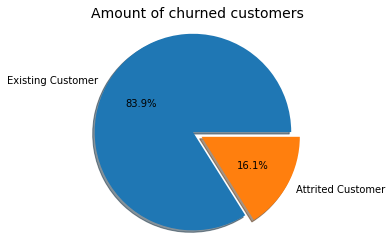

Total number of customers: 10127
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


In [8]:
target = bankchurn["Attrition_Flag"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(target, labels = target.index, autopct = '%1.1f%%', shadow = True, explode = [0.1, 0])
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize = 14)
plt.show()
print('Total number of customers:', bankchurn['Attrition_Flag'].count())
print(bankchurn['Attrition_Flag'].value_counts())

## **Numerical Variables by Target**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


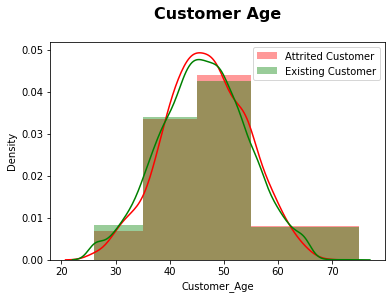

In [9]:
# Customer Age
plt.figure()
sns.distplot(bankchurn.Customer_Age[bankchurn.Attrition_Flag == 'Attrited Customer'], bins = [26, 35, 45, 55, 75], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Customer_Age[bankchurn.Attrition_Flag == 'Existing Customer'], bins = [26, 35, 45, 55, 75], color = 'g', label = 'Existing Customer')
plt.title('Customer Age\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


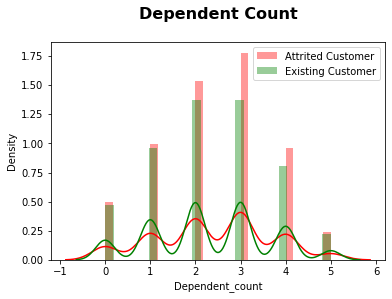

In [10]:
# Dependent_count
plt.figure()
sns.distplot(bankchurn.Dependent_count[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Dependent_count[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Dependent Count\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


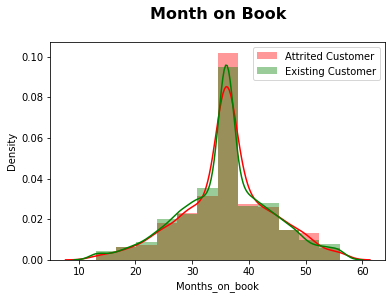

In [11]:
# Months_on_book
plt.figure()
sns.distplot(bankchurn.Months_on_book[bankchurn.Attrition_Flag == 'Attrited Customer'], bins = 12, color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Months_on_book[bankchurn.Attrition_Flag == 'Existing Customer'], bins = 12, color = 'g', label = 'Existing Customer')
plt.title('Month on Book\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


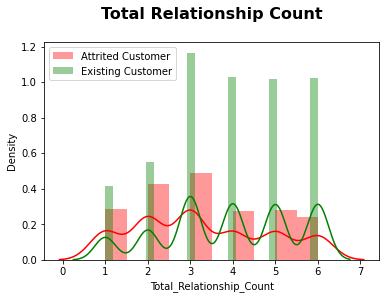

In [12]:
# Total_Relationship_Count
plt.figure()
sns.distplot(bankchurn.Total_Relationship_Count[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Total_Relationship_Count[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Total Relationship Count\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


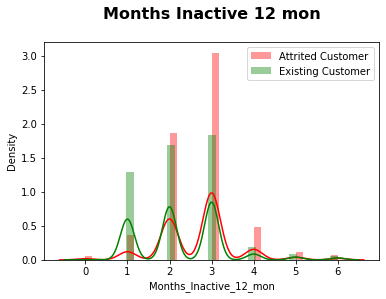

In [13]:
# Months_Inactive_12_mon
plt.figure()
sns.distplot(bankchurn.Months_Inactive_12_mon[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Months_Inactive_12_mon[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Months Inactive 12 mon\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


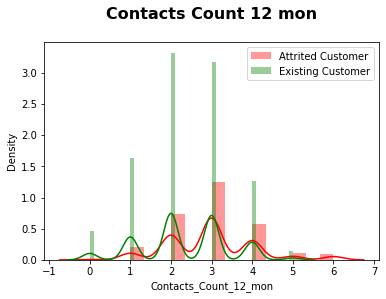

In [14]:
# Contacts_Count_12_mon
plt.figure()
sns.distplot(bankchurn.Contacts_Count_12_mon[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Contacts_Count_12_mon[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Contacts Count 12 mon\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


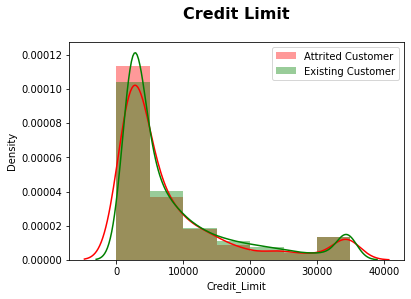

In [15]:
# Credit_Limit
plt.figure()
sns.distplot(bankchurn.Credit_Limit[bankchurn.Attrition_Flag == 'Attrited Customer'], bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Credit_Limit[bankchurn.Attrition_Flag == 'Existing Customer'], bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000], color = 'g', label = 'Existing Customer')
plt.title('Credit Limit\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


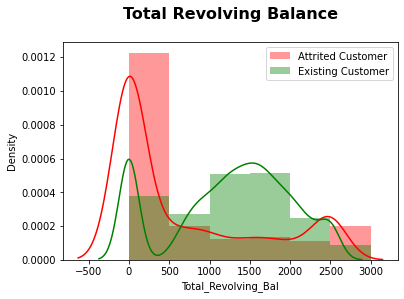

In [16]:
# Total_Revolving_Bal
plt.figure()
sns.distplot(bankchurn.Total_Revolving_Bal[bankchurn.Attrition_Flag == 'Attrited Customer'], bins = [0, 500, 1000, 1500, 2000, 2500, 3000], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Total_Revolving_Bal[bankchurn.Attrition_Flag == 'Existing Customer'], bins = [0, 500, 1000, 1500, 2000, 2500, 3000], color = 'g', label = 'Existing Customer')
plt.title('Total Revolving Balance\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


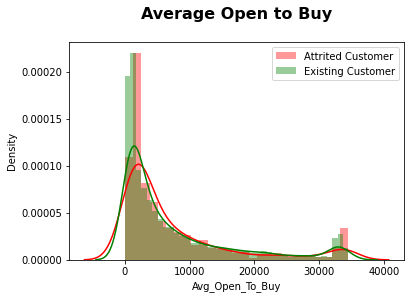

In [17]:
# Avg_Open_To_Buy
plt.figure()
sns.distplot(bankchurn.Avg_Open_To_Buy[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Avg_Open_To_Buy[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Average Open to Buy\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


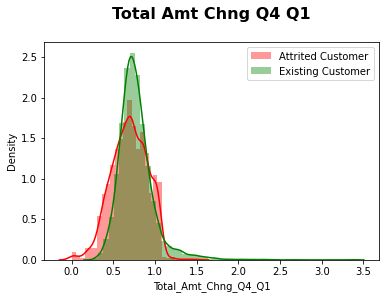

In [18]:
# Total_Amt_Chng_Q4_Q1
plt.figure()
sns.distplot(bankchurn.Total_Amt_Chng_Q4_Q1[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Total_Amt_Chng_Q4_Q1[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Total Amt Chng Q4 Q1\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


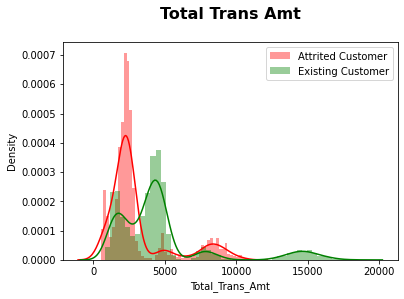

In [19]:
# Total_Trans_Amt
plt.figure()
sns.distplot(bankchurn.Total_Trans_Amt[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Total_Trans_Amt[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Total Trans Amt\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


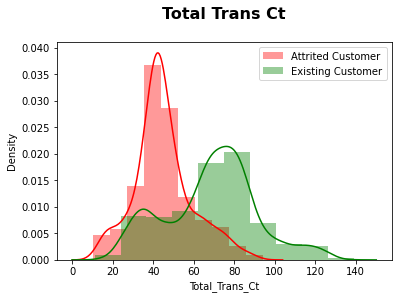

In [20]:
# Total_Trans_Ct
plt.figure()
sns.distplot(bankchurn.Total_Trans_Ct[bankchurn.Attrition_Flag == 'Attrited Customer'], bins = 10, color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Total_Trans_Ct[bankchurn.Attrition_Flag == 'Existing Customer'], bins = 10, color = 'g', label = 'Existing Customer')
plt.title('Total Trans Ct\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


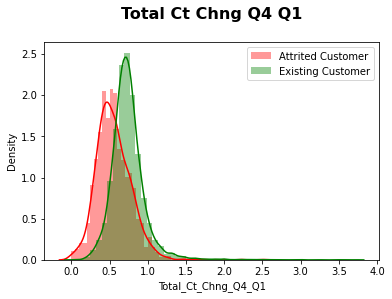

In [21]:
# Total_Ct_Chng_Q4_Q1
plt.figure()
sns.distplot(bankchurn.Total_Ct_Chng_Q4_Q1[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Total_Ct_Chng_Q4_Q1[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Total Ct Chng Q4 Q1\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


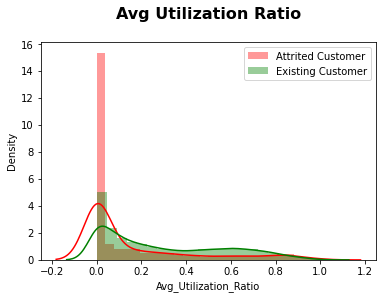

In [22]:
# Avg_Utilization_Ratio
plt.figure()
sns.distplot(bankchurn.Avg_Utilization_Ratio[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Avg_Utilization_Ratio[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Avg Utilization Ratio\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

## **Categorical Variables**

### **Gender**

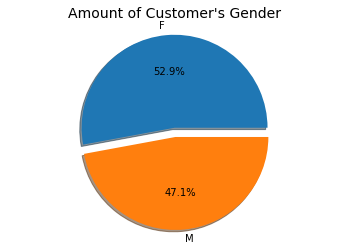

Total number of customers: 10127
F    5358
M    4769
Name: Gender, dtype: int64


In [23]:
gender = bankchurn["Gender"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(gender, labels = gender.index, autopct = '%1.1f%%', shadow = True, explode = [0.1, 0])
ax1.axis('equal')
plt.title("Amount of Customer's Gender", fontsize = 14)
plt.show()
print('Total number of customers:', bankchurn['Gender'].count())
print(bankchurn['Gender'].value_counts())

### **Education Level**

In [24]:
proportion_education = bankchurn['Education_Level'].value_counts()
proportion_education = pd.DataFrame(proportion_education)
proportion_education = proportion_education.rename(columns={'Education_Level':'Count'})
proportion_education = proportion_education.rename_axis('Education_Level').reset_index()
proportion_education

,Education_Level,Count
0,Graduate,3128
1,High School,2013
2,Unknown,1519
3,Uneducated,1487
4,College,1013
5,Post-Graduate,516
6,Doctorate,451


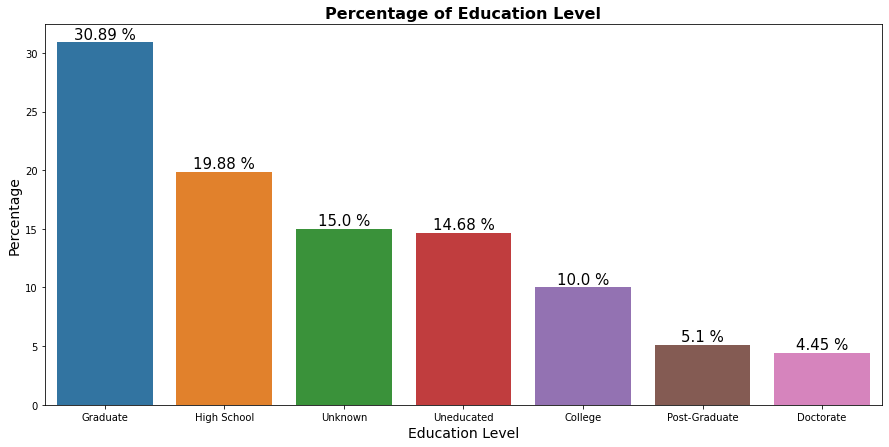

In [25]:
# Education_Level
# Show the proportion of education in bar chart
plt.figure(figsize = (15, 7))

percentage = []
for i in proportion_education['Count']:
  pct = (i / proportion_education['Count'].sum()) * 100
  percentage.append(round(pct, 2))
proportion_education['Percentage'] = percentage

## Show the plot
plots = sns.barplot(x = "Education_Level",
                    y = "Percentage",
                    data = proportion_education)

## Show the annotation
for p in plots.patches:
  plots.annotate('{} %'.format(p.get_height().astype('float')),
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Education Level", size=14)
# Setting the label for y-axis
plt.ylabel("Percentage", size=14)
# Setting the title for the graph
plt.title("Percentage of Education Level", size = 16, weight = 'semibold')
# Fianlly showing the plot
plt.show()

### **Marital Status**

In [26]:
proportion_marital_status = bankchurn['Marital_Status'].value_counts()
proportion_marital_status = pd.DataFrame(proportion_marital_status)
proportion_marital_status = proportion_marital_status.rename(columns={'Marital_Status':'Count'})
proportion_marital_status = proportion_marital_status.rename_axis('Marital_Status').reset_index()
proportion_marital_status

,Marital_Status,Count
0,Married,4687
1,Single,3943
2,Unknown,749
3,Divorced,748


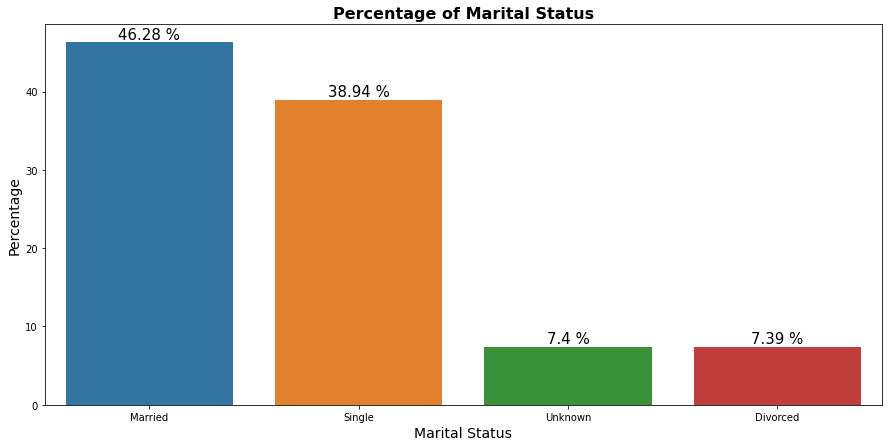

In [27]:
# Show the proportion of education in bar chart
plt.figure(figsize = (15, 7))

percentage = []
for i in proportion_marital_status['Count']:
  pct = (i / proportion_marital_status['Count'].sum()) * 100
  percentage.append(round(pct, 2))
proportion_marital_status['Percentage'] = percentage

## Show the plot
plots = sns.barplot(x = "Marital_Status",
                    y = "Percentage",
                    data = proportion_marital_status)

## Show the annotation
for p in plots.patches:
  plots.annotate('{} %'.format(p.get_height().astype('float')),
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Marital Status", size=14)
# Setting the label for y-axis
plt.ylabel("Percentage", size=14)
# Setting the title for the graph
plt.title("Percentage of Marital Status", size = 16, weight = 'semibold')
# Fianlly showing the plot
plt.show()

### **Income Category**

In [28]:
proportion_income_category = bankchurn['Income_Category'].value_counts()
proportion_income_category = pd.DataFrame(proportion_income_category)
proportion_income_category = proportion_income_category.rename(columns={'Income_Category':'Count'})
proportion_income_category = proportion_income_category.rename_axis('Income_Category').reset_index()
proportion_income_category

,Income_Category,Count
0,Less than $40K,3561
1,$40K - $60K,1790
2,$80K - $120K,1535
3,$60K - $80K,1402
4,Unknown,1112
5,$120K +,727


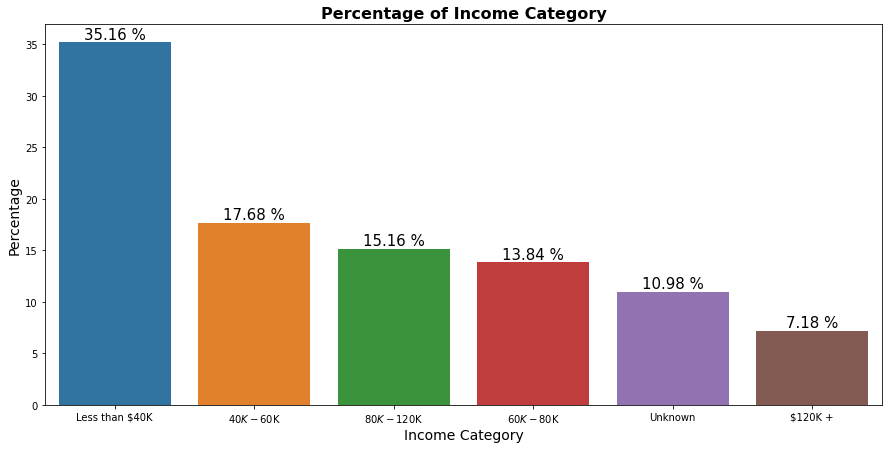

In [29]:
# Show the proportion of education in bar chart
plt.figure(figsize = (15, 7))

percentage = []
for i in proportion_income_category['Count']:
  pct = (i / proportion_income_category['Count'].sum()) * 100
  percentage.append(round(pct, 2))
proportion_income_category['Percentage'] = percentage

## Show the plot
plots = sns.barplot(x = "Income_Category",
                    y = "Percentage",
                    data = proportion_income_category)

## Show the annotation
for p in plots.patches:
  plots.annotate('{} %'.format(p.get_height().astype('float')),
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Income Category", size=14)
# Setting the label for y-axis
plt.ylabel("Percentage", size=14)
# Setting the title for the graph
plt.title("Percentage of Income Category", size = 16, weight = 'semibold')
# Fianlly showing the plot
plt.show()

### **Card Category**

In [30]:
proportion_card_category = bankchurn['Card_Category'].value_counts()
proportion_card_category = pd.DataFrame(proportion_card_category)
proportion_card_category = proportion_card_category.rename(columns={'Card_Category':'Count'})
proportion_card_category = proportion_card_category.rename_axis('Card_Category').reset_index()
proportion_card_category

,Card_Category,Count
0,Blue,9436
1,Silver,555
2,Gold,116
3,Platinum,20


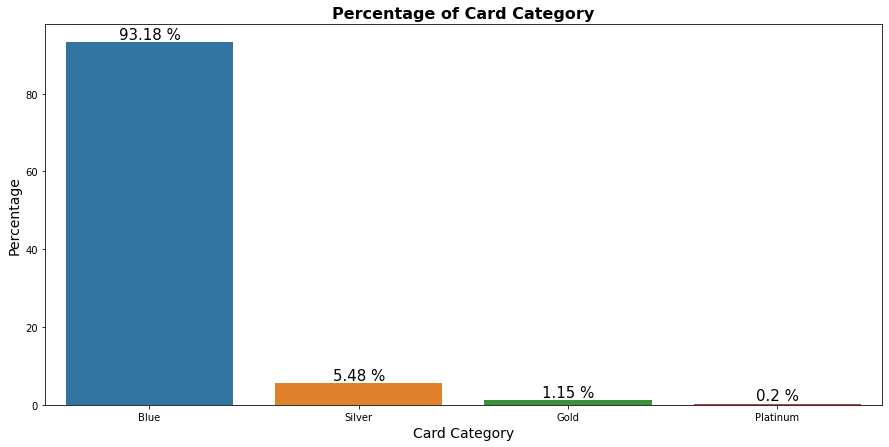

In [31]:
# Show the proportion of education in bar chart
plt.figure(figsize = (15, 7))

percentage = []
for i in proportion_card_category['Count']:
  pct = (i / proportion_card_category['Count'].sum()) * 100
  percentage.append(round(pct, 2))
proportion_card_category['Percentage'] = percentage

## Show the plot
plots = sns.barplot(x = "Card_Category",
                    y = "Percentage",
                    data = proportion_card_category)

## Show the annotation
for p in plots.patches:
  plots.annotate('{} %'.format(p.get_height().astype('float')),
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Card Category", size=14)
# Setting the label for y-axis
plt.ylabel("Percentage", size=14)
# Setting the title for the graph
plt.title("Percentage of Card Category", size = 16, weight = 'semibold')
# Fianlly showing the plot
plt.show()

## **Checking Outliers**

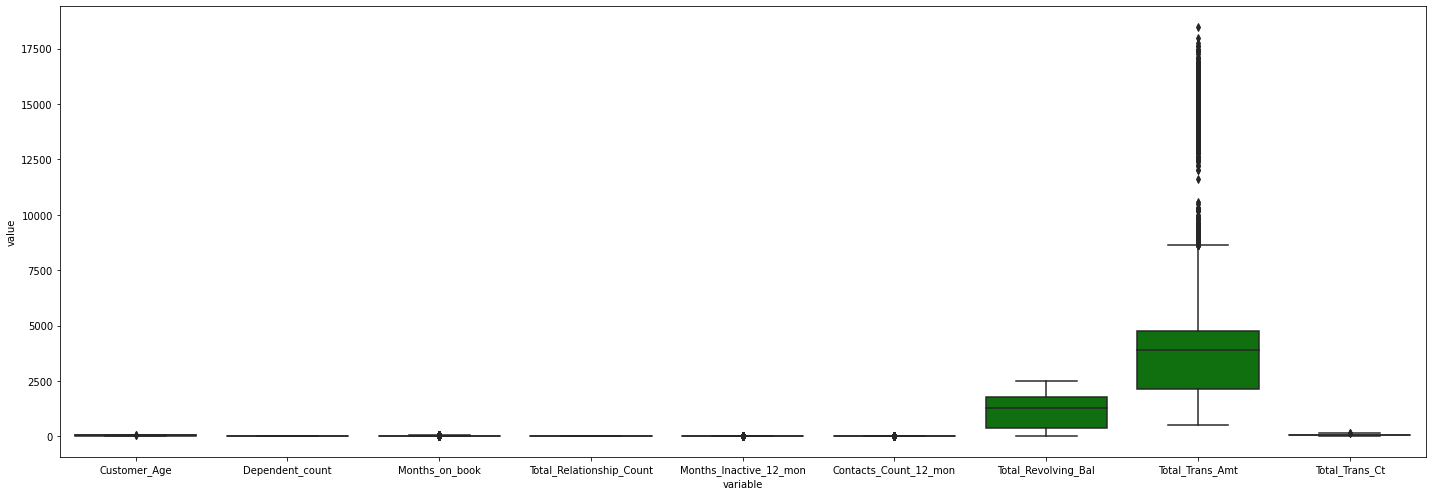

In [32]:
dfo1 = bankchurn.select_dtypes(include = ['int64'])
plt.figure(figsize = (20, 7))
sns.boxplot(x = 'variable', y = 'value', color = 'green', orient = 'v', data = pd.melt(dfo1))
plt.tight_layout()

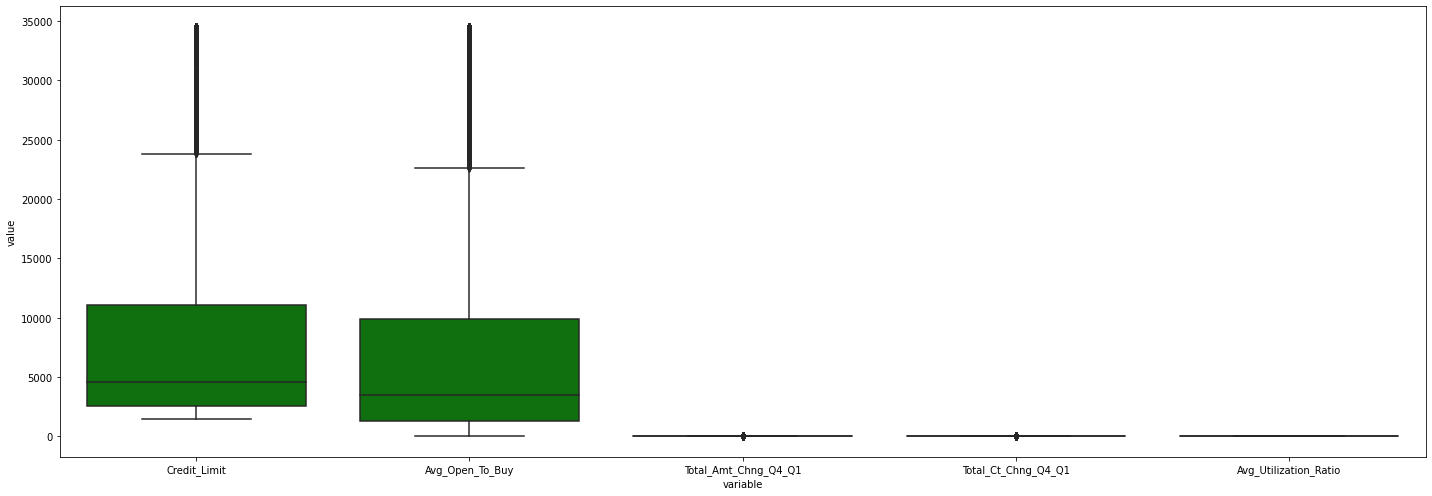

In [33]:
dfo2 = bankchurn.select_dtypes(include = ['float64']) # memilih kolom numerik
plt.figure(figsize = (20, 7))
sns.boxplot(x = 'variable', y = 'value', color = 'green', orient = 'v', data = pd.melt(dfo2))
plt.tight_layout()

## **Checking Correlation**

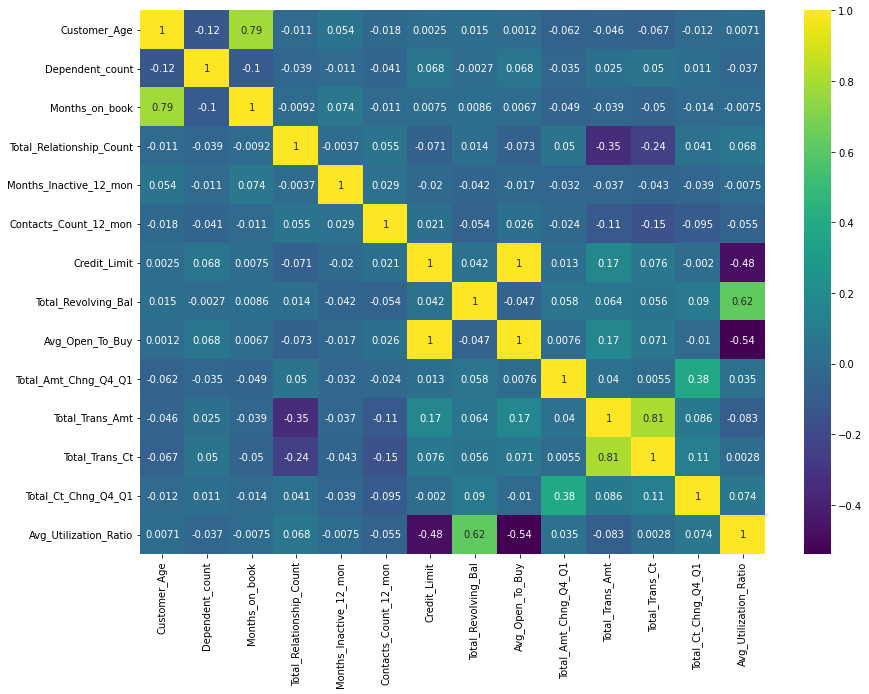

In [34]:
dfk = bankchurn.select_dtypes(include = ['int64', 'float64']) # memilih kolom numerik
k = len(dfk.columns)
cm = dfk.corr()
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True, cmap = 'viridis')

## **Normality Test**

In [35]:
numeric_uji = bankchurn[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                        'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
                        'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']].sample(n = 50, random_state = 21)
numeric_uji.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7061,48,5,36,4,1,2,4100.0,1956,2144.0,0.617,3584,61,0.743,0.477
9075,51,3,37,1,2,1,34516.0,0,34516.0,0.814,8736,97,0.702,0.000
7608,40,2,27,6,3,1,8494.0,2023,6471.0,0.871,4486,77,0.974,0.238
1384,46,4,36,3,3,4,1438.3,981,457.3,0.663,1114,33,0.650,0.682
6871,43,3,32,6,3,3,1897.0,0,1897.0,0.645,2866,47,0.469,0.000


In [36]:
nilai_statistik = list()
p_value = list()
hasil = list()
for i in numeric_uji:
    ns, pv = stats.shapiro(numeric_uji[i])
    hsl = 'normal' if pv > .05 else 'tidak normal'
    nilai_statistik.append(ns)
    p_value.append(pv)
    hasil.append(hsl)

uji = pd.DataFrame(nilai_statistik, index = numeric_uji.columns, columns = ['nilai statistik'])
uji['p-value'] = p_value
uji['sig lvl'] = 0.05
uji['hasil uji'] = hasil
uji

,nilai statistik,p-value,sig lvl,hasil uji
Customer_Age,0.960317,9.165532e-02,0.05,normal
Dependent_count,0.921909,2.765903e-03,0.05,tidak normal
Months_on_book,0.957837,7.215334e-02,0.05,normal
Total_Relationship_Count,0.922994,3.030233e-03,0.05,tidak normal
Months_Inactive_12_mon,0.796414,7.256186e-07,0.05,tidak normal
Contacts_Count_12_mon,0.924277,3.377850e-03,0.05,tidak normal
Credit_Limit,0.740214,4.706309e-08,0.05,tidak normal
Total_Revolving_Bal,0.892568,2.755597e-04,0.05,tidak normal
Avg_Open_To_Buy,0.743039,5.350601e-08,0.05,tidak normal
Total_Amt_Chng_Q4_Q1,0.898228,4.201453e-04,0.05,tidak normal


# **Data Preprocessing**

## **Remove Credit Limit**

In [37]:
bankchurn = bankchurn.drop('Credit_Limit', axis = 1)
bankchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

## **Feature Scalling**

In [38]:
stand_var = ['Customer_Age', 'Months_on_book', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
norm_var = ['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
            'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']

for stand in bankchurn[stand_var]:
    bankchurn[stand] = StandardScaler().fit_transform(bankchurn[stand].values.reshape(len(bankchurn), 1))
for norm in bankchurn[norm_var]:
    bankchurn[norm] = MinMaxScaler().fit_transform(bankchurn[norm].values.reshape(len(bankchurn), 1))

## **Categorical Encoding**

In [39]:
# Ordinal Encoding
LE = LabelEncoder()
for cat in list(['Attrition_Flag', 'Education_Level', 'Income_Category', 'Card_Category']):
    bankchurn[cat] = LE.fit_transform(bankchurn[cat])

# Nominal Encoding
nominal_cats = ['Gender', 'Marital_Status']
for cat in nominal_cats:
    onehot = pd.get_dummies(bankchurn[cat], prefix = cat)
    bankchurn = bankchurn.join(onehot)

bankchurn = bankchurn.drop(['Gender', 'Marital_Status'], axis = 1)

## **Train Test Split**

In [40]:
X = bankchurn.drop(['Attrition_Flag'], axis = 1).astype(float).values
y = bankchurn['Attrition_Flag'].astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## **Imbalanced Dataset**

In [41]:
smote = SMOTE(random_state = 0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print('Before SMOTE')
print(pd.DataFrame(y_train).value_counts())
print('After SMOTE')
print(pd.DataFrame(y_resampled).value_counts())

Before SMOTE
1.0    6801
0.0    1300
dtype: int64
After SMOTE
1.0    6801
0.0    6801
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# **Modeling**

## **Logistic Regression**

In [42]:
# Train model
log_model = LogisticRegression().fit(X_resampled, y_resampled)

# Predict
log_y_test_pred = log_model.predict(X_test)

# Performance
print('Accuracy:', accuracy_score(y_test, log_y_test_pred))
print('Precision:', precision_score(y_test, log_y_test_pred, average = 'macro'))
print('Recall/Sensitivity:', recall_score(y_test, log_y_test_pred, average = 'macro'))
print('Cross Entropy Loss:', tf.keras.metrics.binary_crossentropy(y_test, log_y_test_pred).numpy())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.8568608094768015
Precision: 0.7496765957113524
Recall/Sensitivity: 0.8442742897873007
Cross Entropy Loss: 2.2079146379222743


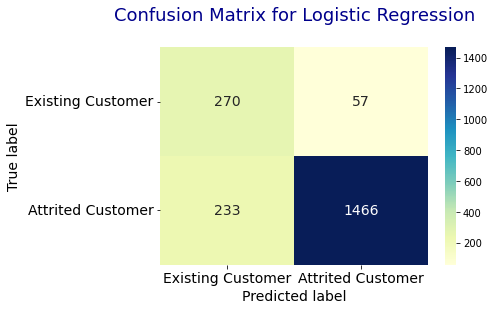

In [43]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, log_y_test_pred)),
                                   ('Existing Customer', 'Attrited Customer'),
                                   ('Existing Customer', 'Attrited Customer'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {'size' : 14}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'center', fontsize = 14)

plt.title('Confusion Matrix for Logistic Regression\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label',fontsize = 14)
plt.show()

## **Random Forest Classifier**

In [44]:
# Train model
rf_model = RandomForestClassifier(random_state = 42).fit(X_resampled, y_resampled)

# Predict
rf_y_test_pred = rf_model.predict(X_test)

# Performance
print('Accuracy:', accuracy_score(y_test, rf_y_test_pred))
print('Precision:', precision_score(y_test, rf_y_test_pred, average = 'macro'))
print('Recall/Sensitivity:', recall_score(y_test, rf_y_test_pred, average = 'macro'))
print('Cross Entropy Loss:', tf.keras.metrics.binary_crossentropy(y_test, rf_y_test_pred).numpy())

Accuracy: 0.9550839091806516
Precision: 0.9158161806746712
Recall/Sensitivity: 0.9188900468525287
Cross Entropy Loss: 0.6928283863858992


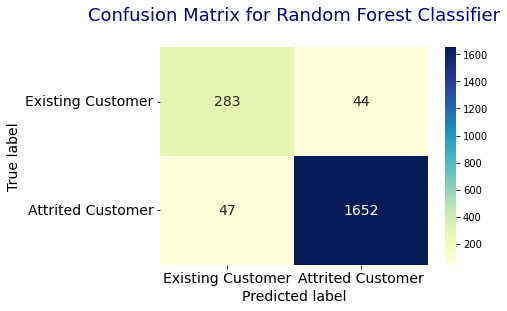

In [45]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, rf_y_test_pred)),
                                   ('Existing Customer', 'Attrited Customer'),
                                   ('Existing Customer', 'Attrited Customer'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {'size' : 14}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'center', fontsize = 14)

plt.title('Confusion Matrix for Random Forest Classifier\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

## **Gradient Boosting Classifier**

In [46]:
# Train model
gb_model = GradientBoostingClassifier().fit(X_resampled, y_resampled)

# Predict
gb_y_test_pred = gb_model.predict(X_test)

# Performance
print('Accuracy:', accuracy_score(y_test, gb_y_test_pred))
print('Precision:', precision_score(y_test, gb_y_test_pred, average = 'macro'))
print('Recall/Sensitivity:', recall_score(y_test, gb_y_test_pred, average = 'macro'))
print('Cross Entropy Loss:', tf.keras.metrics.binary_crossentropy(y_test, gb_y_test_pred).numpy())

Accuracy: 0.9585389930898321
Precision: 0.9185337117257948
Recall/Sensitivity: 0.9308281719953994
Cross Entropy Loss: 0.6395338951248458


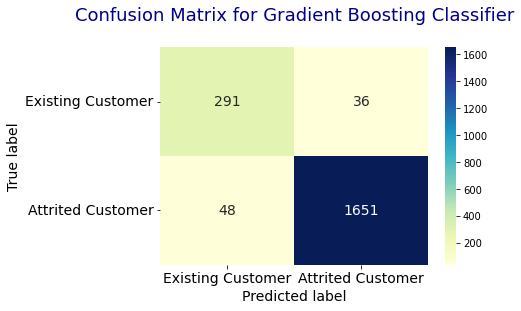

In [47]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, gb_y_test_pred)),
                                   ('Existing Customer', 'Attrited Customer'),
                                   ('Existing Customer', 'Attrited Customer'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {'size' : 14}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'center', fontsize = 14)

plt.title('Confusion Matrix for Gradient Boosting Classifier\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

# **Model Selection**

The Logistic Regression model, as much as 270 data with the status of Existing Customers have been correctly predicted as Existing Customers, and as much as 1466 data with the status of Attrited Customers have been correctly predicted as Attrited Customers, but this model also makes prediction errors of 290 data. Based on these results, the performance of the model obtained is an Accuracy score of 85.69%, a Precision score of 74.97%, and a Recall score of 84.43% with a Cross Entropy Loss of 2.2079.

The Random Forest Classifier model, as much as 283 data with the status of Existing Customers have been correctly predicted as Existing Customers, and as much as 1652 data with the status of Attrited Customers have been correctly predicted as Attrited Customers, but this model also makes prediction errors of 91 data. Based on these results, the performance of the model obtained is an Accuracy score of 95.51%, a Precision score of 91.58%, and a Recall score of 91.89% with a Cross Entropy Loss of 0.6928.

The Gradient Boosting Classifier model, as much as 291 data with the status of Existing Customers have been correctly predicted as Existing Customers, and as much as 1651 data with the status of Attrited Customers have been correctly predicted as Attrited Customers, but this model also makes prediction errors of 84 data. Based on these results, the performance of the model obtained is an Accuracy score of 95.85%, a Precision score of 91.85%, and a Recall score of 93.08% with a Cross Entropy Loss of 0.6395.

Based on the performance of the three models, it can be concluded that the **Gradient Boosting** model is the best performing model for this dataset case.